**Prathik Ranganatha Gowda**

*GWID:G39130537*

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.impute import SimpleImputer

In [ ]:
file_paths = [

    'yellow_tripdata_2023-01.parquet',
    'yellow_tripdata_2023-02.parquet',
    'yellow_tripdata_2023-03.parquet',
    'yellow_tripdata_2023-04.parquet',
    'yellow_tripdata_2023-05.parquet',
    'yellow_tripdata_2023-06.parquet'
]
dataframes = [pd.read_parquet(fp) for fp in file_paths]
full_df = pd.concat(dataframes, ignore_index=True)

In [ ]:
print(full_df.head)

<bound method NDFrame.head of           VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0                2  2023-01-01 00:32:10   2023-01-01 00:40:36   
1                2  2023-01-01 00:55:08   2023-01-01 01:01:27   
2                2  2023-01-01 00:25:04   2023-01-01 00:37:49   
3                1  2023-01-01 00:03:48   2023-01-01 00:13:25   
4                2  2023-01-01 00:10:29   2023-01-01 00:21:19   
...            ...                  ...                   ...   
19493615         2  2023-06-30 23:30:21   2023-07-01 00:00:46   
19493616         1  2023-06-30 23:34:22   2023-07-01 00:32:59   
19493617         2  2023-06-30 23:45:00   2023-07-01 00:10:00   
19493618         2  2023-06-30 23:13:38   2023-06-30 23:51:19   
19493619         2  2023-06-30 23:18:00   2023-06-30 23:31:00   

          passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                     1.0           0.97         1.0                  N   
1                     1.0           1.1

In [ ]:
# Descriptive statistics for numerical features
numerical_stats = full_df.describe()
numerical_stats

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
count,1.949362e+07,1.896507e+07,1.949362e+07,1.896507e+07,1.949362e+07,1.949362e+07,1.949362e+07,1.949362e+07,1.949362e+07,1.949362e+07,1.949362e+07,1.949362e+07,1.949362e+07,1.949362e+07,1.896507e+07,2.995023e+06,1.597004e+07
mean,1.731932e+00,1.362985e+00,4.080599e+00,1.563772e+00,1.656123e+02,1.641788e+02,1.188860e+00,1.915441e+01,1.590796e+00,4.870936e-01,3.499122e+00,5.680705e-01,9.811725e-01,2.804726e+01,2.272390e+00,1.074086e-01,1.279918e-01
std,4.488161e-01,8.921839e-01,2.496444e+02,6.929746e+00,6.405296e+01,6.990982e+01,5.381071e-01,8.958938e+01,1.837277e+00,1.037683e-01,4.020777e+00,2.140092e+00,1.895851e-01,9.065431e+01,7.794473e-01,3.556511e-01,4.385002e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-9.599000e+02,-7.500000e+00,-5.000000e-01,-4.110000e+02,-7.330000e+01,-1.000000e+00,-9.829500e+02,-2.500000e+00,-1.250000e+00,-1.750000e+00
25%,1.000000e+00,1.000000e+00,1.070000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.575000e+01,2.500000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.800000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.800000e+00,0.000000e+00,1.000000e+00,2.065000e+01,2.500000e+00,0.000000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,3.420000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.120000e+01,2.500000e+00,5.000000e-01,4.340000e+00,0.000000e+00,1.000000e+00,3.010000e+01,2.500000e+00,0.000000e+00,0.000000e+00
max,6.000000e+00,9.000000e+00,3.423448e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,3.869836e+05,9.638000e+01,5.316000e+01,9.843000e+02,6.655600e+02,1.000000e+00,3.869876e+05,2.750000e+00,1.250000e+00,1.750000e+00


In [ ]:
# Trip duration in minutes
full_df['trip_duration'] = (full_df['tpep_dropoff_datetime'] - full_df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Time features
full_df['pickup_hour'] = full_df['tpep_pickup_datetime'].dt.hour
full_df['pickup_day_of_week'] = full_df['tpep_pickup_datetime'].dt.dayofweek
full_df['pickup_day'] = full_df['tpep_pickup_datetime'].dt.day
full_df['pickup_month'] = full_df['tpep_pickup_datetime'].dt.month
full_df['pickup_year'] = full_df['tpep_pickup_datetime'].dt.year

# Converting categorical features to category dtype
categorical_features = ['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type']
full_df[categorical_features] = full_df[categorical_features].astype('category')

# To cleanse Data
# Removing trips with invalid distances or fare amounts
full_df = full_df[full_df['trip_distance'] > 0]
full_df = full_df[(full_df['fare_amount'] > 0) & (full_df['fare_amount'] <= 500)]  # Adjust the upper bound as per your analysis

# One-hot encoding for 'store_and_fwd_flag'
full_df = pd.get_dummies(full_df, columns=['store_and_fwd_flag'], drop_first=True)

# Checking for redundant 'airport_fee' columns and remove if necessary
if 'Airport_fee' in full_df.columns:
    full_df = full_df.drop(columns=['Airport_fee'])

# Dropping the original datetime columns to avoid redundancy
full_df = full_df.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])

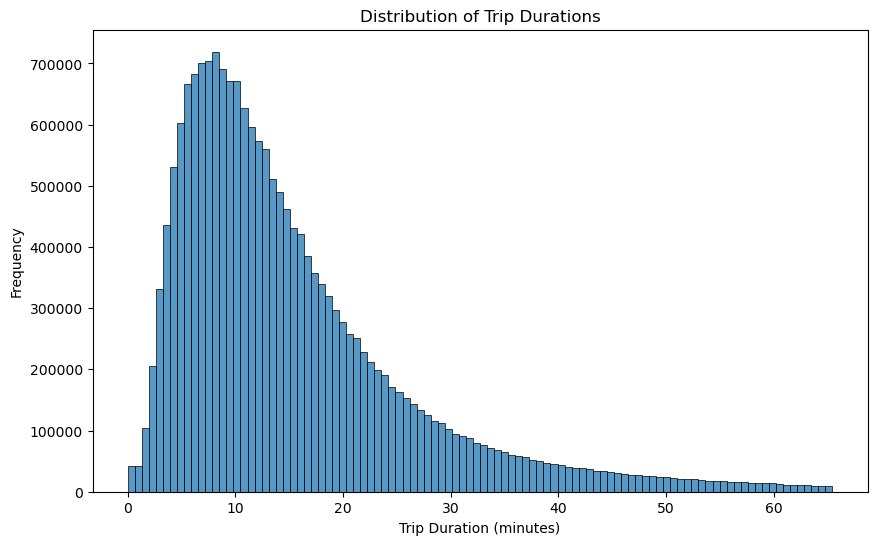

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that the dataset only contains trips with a positive duration
full_df = full_df[full_df['trip_duration'] > 0]

# Limit the data to 99th percentile to exclude extreme outliers
max_duration = full_df['trip_duration'].quantile(0.99)

# Histogram of trip durations with a limited range and increased bins
plt.figure(figsize=(10, 6))
sns.histplot(full_df[full_df['trip_duration'] <= max_duration]['trip_duration'], bins=100, kde=False)
plt.title('Distribution of Trip Durations')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


#Log transformation

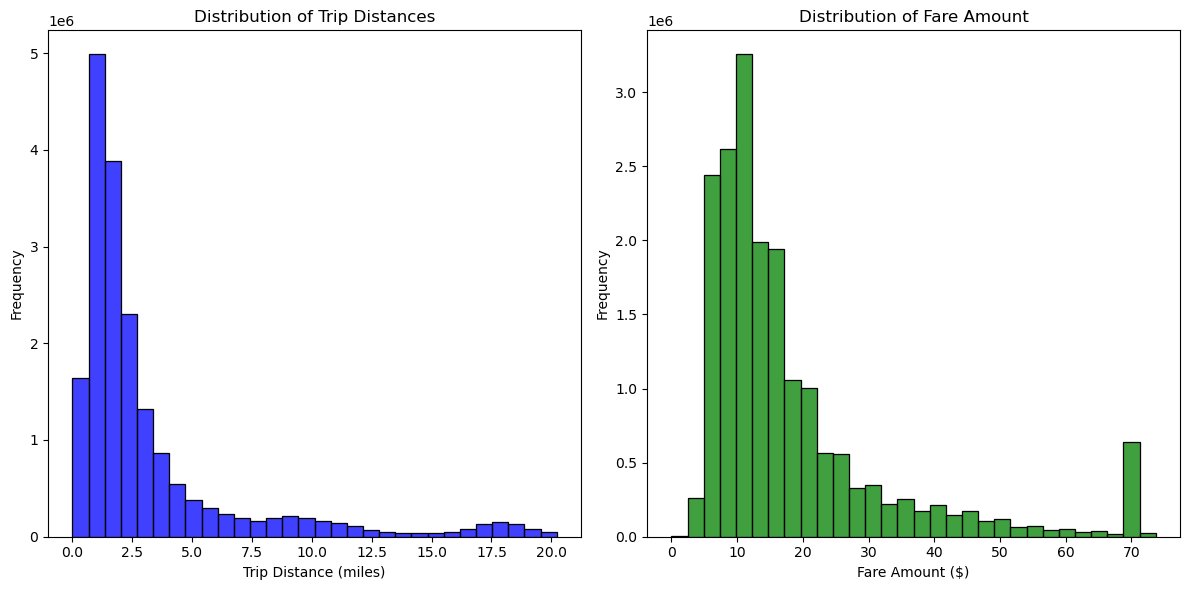

In [ ]:
# Remove outliers based on a reasonable threshold for trip distances and fare amounts
distance_threshold = full_df['trip_distance'].quantile(0.99)
fare_threshold = full_df['fare_amount'].quantile(0.99)

filtered_df = full_df[(full_df['trip_distance'] <= distance_threshold) &
                      (full_df['fare_amount'] <= fare_threshold)]

# Plotting the distribution with log transformation
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(filtered_df['trip_distance'], bins=30, color='blue')
plt.title('Distribution of Trip Distances')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(filtered_df['fare_amount'], bins=30, color='green')
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


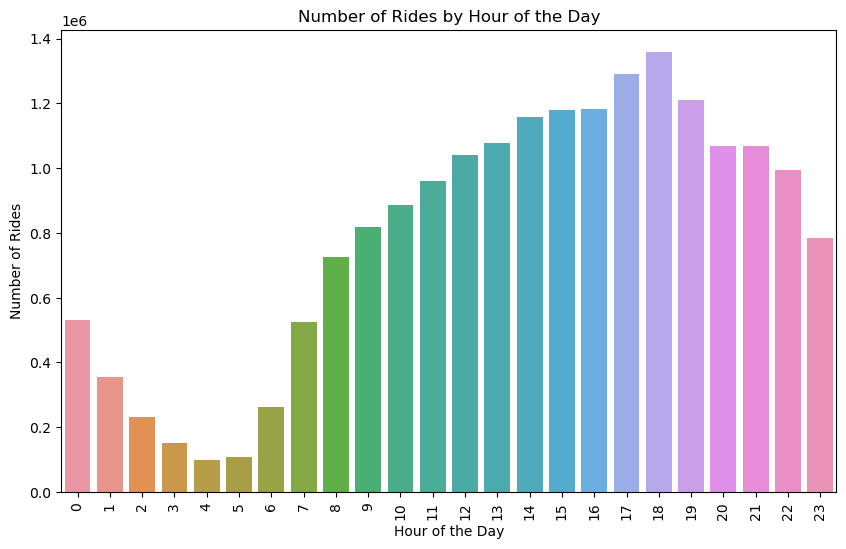

In [ ]:
#Time Series Analysis of Rides
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_hour', data=full_df)
plt.title('Number of Rides by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.xticks(rotation=90)
plt.show()

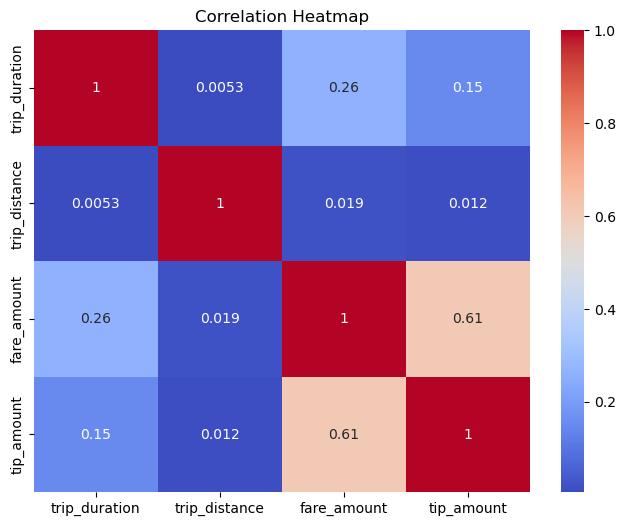

In [ ]:
#To visualize correlations between numerical variables
corr = full_df[['trip_duration', 'trip_distance', 'fare_amount', 'tip_amount']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

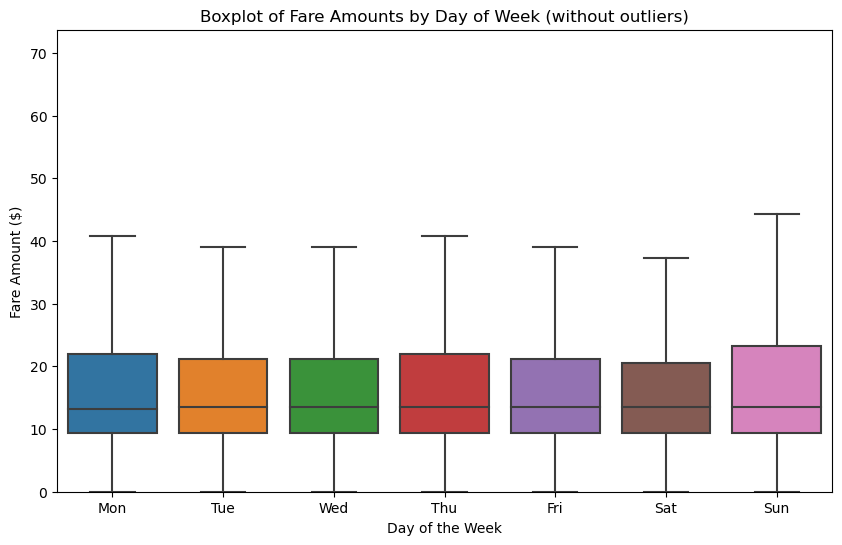

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='pickup_day_of_week', y='fare_amount', data=full_df, showfliers=False)
plt.title('Boxplot of Fare Amounts by Day of Week (without outliers)')
plt.xlabel('Day of the Week')
plt.ylabel('Fare Amount ($)')
plt.ylim(0, full_df['fare_amount'].quantile(0.99))  # Set the limit to the 99th percentile
plt.xticks(ticks=list(range(7)), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

In [ ]:
# Check unique Vendor IDs
unique_vendors = full_df['VendorID'].unique()
print("Unique Vendor IDs:", unique_vendors)

Unique Vendor IDs: [2, 1, 6]
Categories (3, int64): [1, 2, 6]


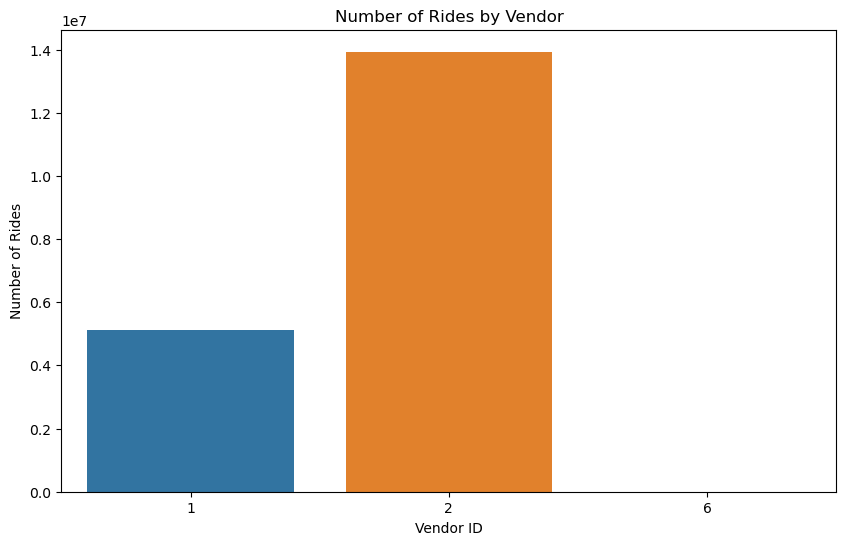

In [ ]:
#Analyzing ride patterns across different vendors
plt.figure(figsize=(10, 6))
sns.countplot(x='VendorID', data=full_df)
plt.title('Number of Rides by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Number of Rides')
plt.show()

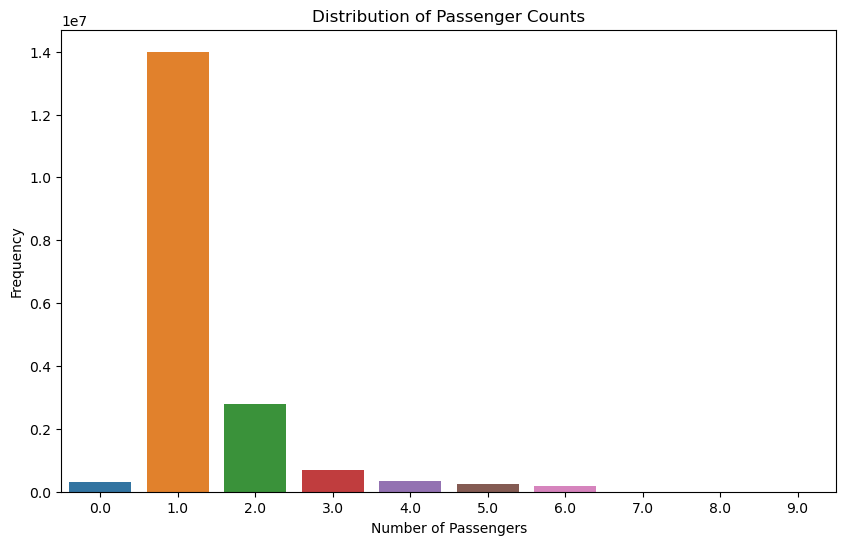

In [ ]:
#To visualize the distribution of passenger counts, which could be indicative of the ride types
plt.figure(figsize=(10, 6))
sns.countplot(x='passenger_count', data=full_df)
plt.title('Distribution of Passenger Counts')
plt.xlabel('Number of Passengers')
plt.ylabel('Frequency')
plt.show()

In [ ]:
plt.figure(figsize=(16, 10))  # Adjusting figure size for better clarity
average_fare_by_PULocation = full_df.groupby('PULocationID')['fare_amount'].mean().sort_values(ascending=False).head(20)
average_fare_by_PULocation

PULocationID
99     110.328571
156     91.954545
1       87.939324
251     77.857368
84      74.944444
10      64.588973
5       64.321839
132     63.503210
221     62.750556
109     62.676250
219     62.285069
93      60.654288
214     59.831585
172     59.664286
265     59.448064
216     59.021010
23      58.335829
27      58.200000
44      57.567665
8       57.311892
Name: fare_amount, dtype: float64

<Figure size 1600x1000 with 0 Axes>

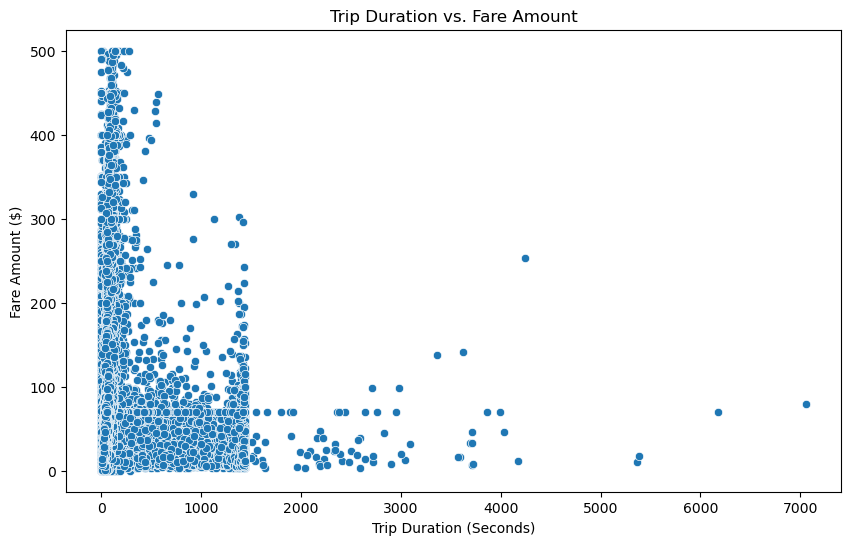

In [ ]:
#Investigatting the relationship between trip duration and fare amount to see how they correlate.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_duration', y='fare_amount', data=full_df)
plt.title('Trip Duration vs. Fare Amount')
plt.xlabel('Trip Duration (Seconds)')
plt.ylabel('Fare Amount ($)')
plt.show()

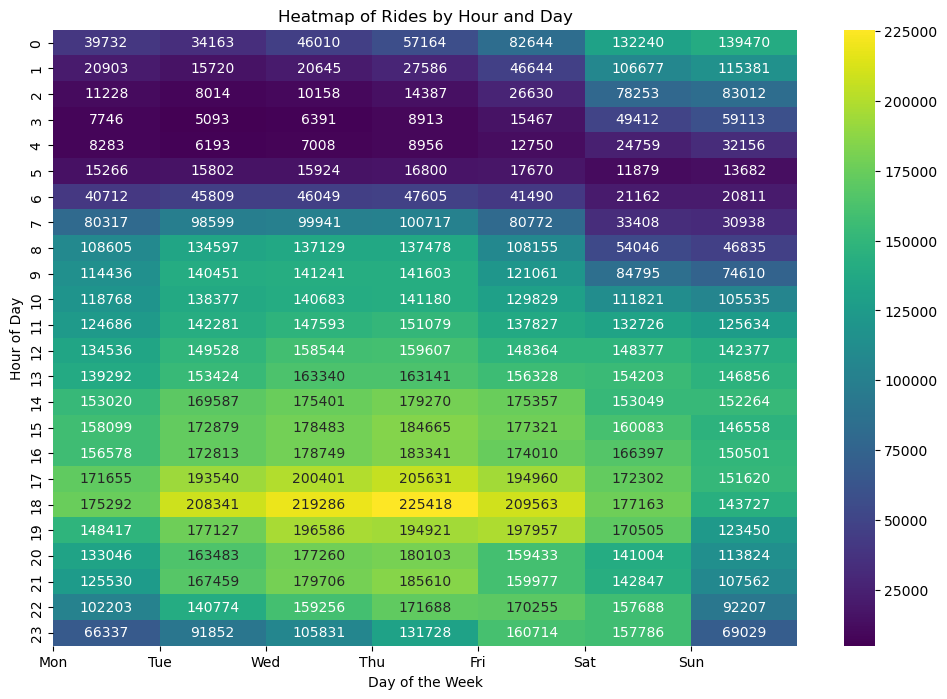

In [ ]:
#To visualize the concentration of rides throughout different hours and days of the week, revealing rush hours and quiet times
pivot_table = full_df.pivot_table(index='pickup_hour', columns='pickup_day_of_week', values='VendorID', aggfunc='count')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt=".0f")
plt.title('Heatmap of Rides by Hour and Day')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of Day')
plt.xticks(ticks=list(range(7)), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

In [ ]:
# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

# Identify outliers in the fare amount
fare_outliers = detect_outliers_iqr(full_df, 'fare_amount')
print(f"Number of outliers detected in fare amounts: {len(fare_outliers)}")

# Option 1: Remove outliers from the dataset
full_df_no_outliers = full_df[~full_df.index.isin(fare_outliers.index)]


Number of outliers detected in fare amounts: 2053395


In [ ]:
# Split the data into features and target variable
X = full_df_no_outliers.drop('fare_amount', axis=1)
y = full_df_no_outliers['fare_amount']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
imputer = SimpleImputer(strategy='mean')

# Apply imputation to our data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [ ]:
# Initializing the Linear Regression model
lr_model = LinearRegression()

# Training the model
lr_model.fit(X_train_imputed, y_train)


# Making predictions
lr_predictions = lr_model.predict(X_test_imputed)

In [ ]:
# Initializing the Random Forest Regressor model
#rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model = RandomForestRegressor(
    n_estimators=200,  # More trees for averaging out predictions
    max_depth=10,      # Not too deep
    min_samples_split=10,  # At least 10 samples to split a node
    min_samples_leaf=4,    # At least 4 samples to be a leaf node
    max_features='sqrt',   # A subset of features for diversity
    bootstrap=True,        # Use bootstrapping
    random_state=42        # For reproducibility
)

# Training the model
rf_model.fit(X_train_imputed, y_train)

# Making predictions
rf_predictions = rf_model.predict(X_test_imputed)

In [ ]:
# Initializing the XGB Regressor  model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,  # More trees
    learning_rate=0.05,  # Smaller learning rate
    max_depth=6,  # Moderate depth
    min_child_weight=3,  # Minimum sum of instance weight (hessian) needed in a child
    subsample=0.8,  # Subsample ratio of the training instances
    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    gamma=0.1,  # Minimum loss reduction required to make a further partition
    alpha=0.1,  # L1 regularization term
    seed=42  # For reproducibility
)
# Training the model
xgb_model.fit(X_train_imputed, y_train)

# Making predictions
xgb_predictions = xgb_model.predict(X_test_imputed)
xgb_model.save_model('model.json')


In [ ]:
# Evaluate the models
def evaluate(predictions, true_values):
    mse = mean_squared_error(true_values, predictions)
    rmse = mse ** 0.5
    r2 = r2_score(true_values, predictions)
    return mse, rmse, r2

lr_mse, lr_rmse, lr_r2 = evaluate(lr_predictions, y_test)
rf_mse, rf_rmse, rf_r2 = evaluate(rf_predictions, y_test)
xgb_mse, xgb_rmse, xgb_r2 = evaluate(xgb_predictions, y_test)

print(f"Linear Regression - MSE: {lr_mse}, RMSE: {lr_rmse}, R2: {lr_r2}")
print(f"Random Forest - MSE: {rf_mse}, RMSE: {rf_rmse}, R2: {rf_r2}")
print(f"XGBoost - MSE: {xgb_mse}, RMSE: {xgb_rmse}, R2: {xgb_r2}")

Linear Regression - MSE: 0.1043300577919678, RMSE: 0.32300163744471605, R2: 0.9981074022721887
Random Forest - MSE: 0.6850818223607789, RMSE: 0.8276966970821974, R2: 0.9875722842696955
XGBoost - MSE: 0.11860445419679723, RMSE: 0.34438997400737037, R2: 0.9978484578148251


In [ ]:
train_predictions = xgb_model.predict(X_train)
test_predictions = xgb_model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")

# If test_mse is much higher than train_mse, it could indicate overfitting.


Training MSE: 0.2223815945969502
Testing MSE: 0.22308495006139134


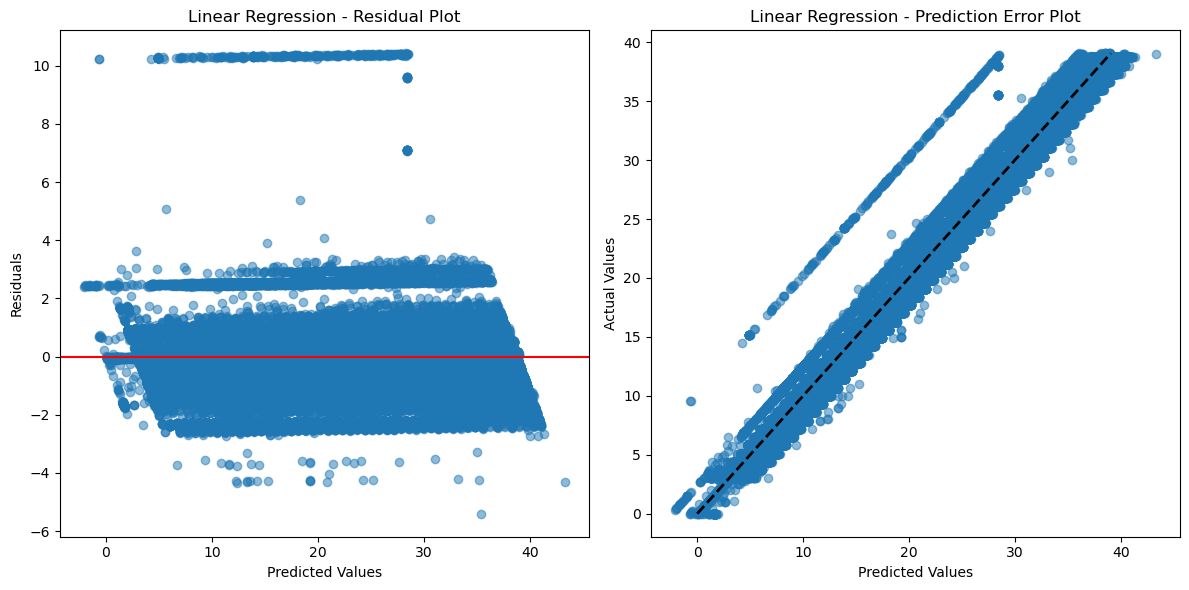

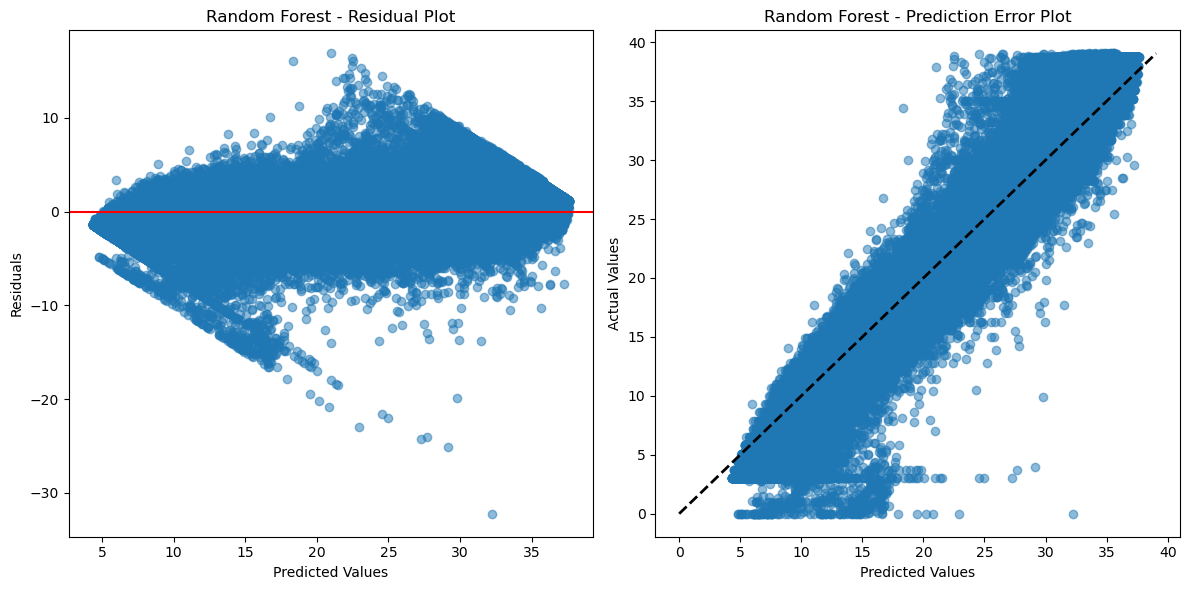

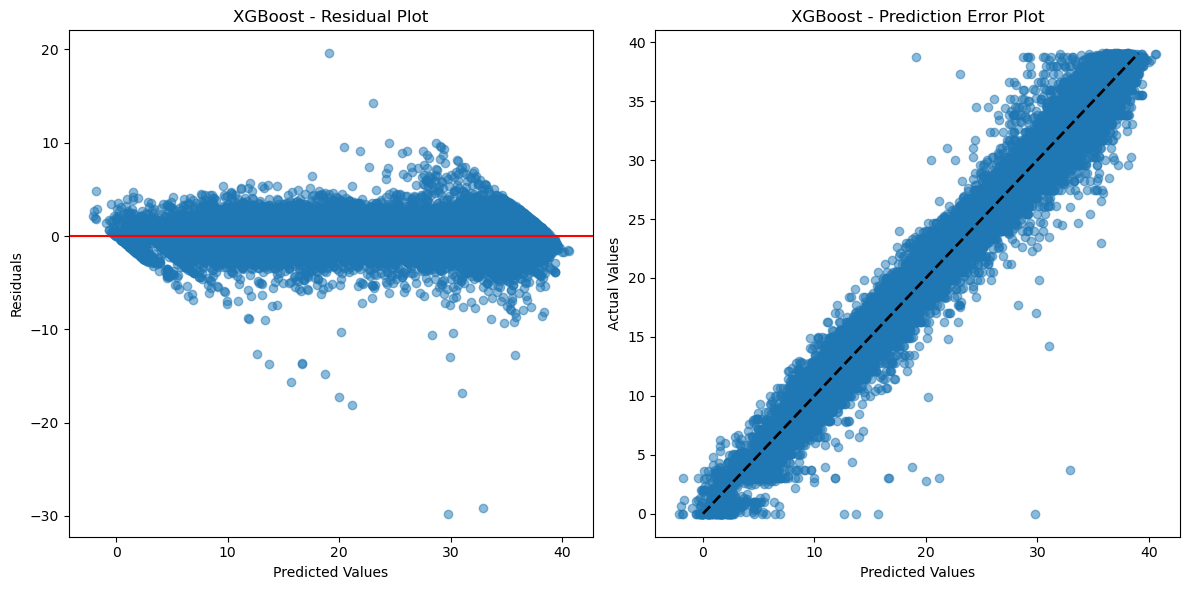

In [ ]:
import matplotlib.pyplot as plt

# Function to plot residual and prediction error plots
def plot_model_diagnostics(model_name, predictions, true_values):
    residuals = true_values - predictions

    plt.figure(figsize=(12, 6))

    # Residual Plot
    plt.subplot(1, 2, 1)
    plt.scatter(predictions, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title(f'{model_name} - Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

    # Prediction Error Plot
    plt.subplot(1, 2, 2)
    plt.scatter(predictions, true_values, alpha=0.5)
    plt.plot([true_values.min(), true_values.max()], [true_values.min(), true_values.max()], 'k--', lw=2)  # Diagonal line
    plt.title(f'{model_name} - Prediction Error Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')

    plt.tight_layout()
    plt.show()

# Linear Regression Diagnostics
plot_model_diagnostics('Linear Regression', lr_predictions, y_test)

# Random Forest Diagnostics
plot_model_diagnostics('Random Forest', rf_predictions, y_test)

# XGBoost Diagnostics
plot_model_diagnostics('XGBoost', xgb_predictions, y_test)